In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [3]:
dfa = pd.read_pickle("../run/results/complete_aggregate_measures.pkl")

In [4]:
def plot2d_df(metric, ax, metric_title, cmap, save_name):
    
    ax.imshow(metric, origin="lower", extent=[0, 1, 0, 1], cmap=cmap)
    ax.set_xlabel("Feature Similarity")
    ax.set_ylabel("Readout Similarity")
    ax.set_title(metric_title)

<ipython-input-6-02b09df72fee>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


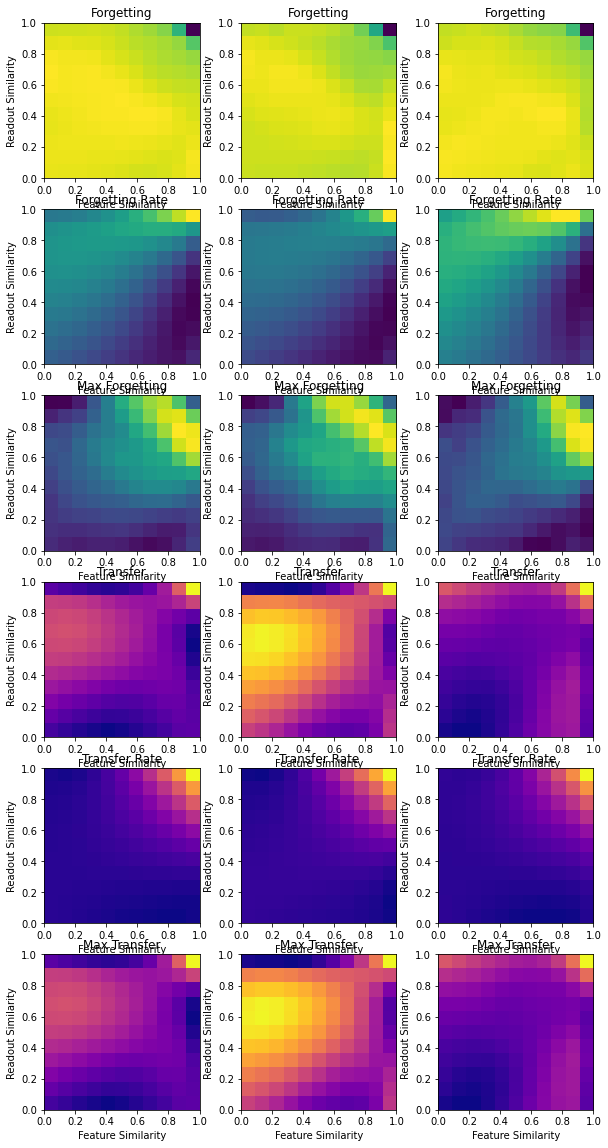

In [6]:
fig, axs = plt.subplots(6, 3,figsize=(10,20))


metrics = ['Forgetting','Forgetting Rate','Max Forgetting','Transfer','Transfer Rate','Max Transfer']
cmaps = ['viridis','viridis','viridis','plasma','plasma','plasma']

c = 0
for r, (m, cmap) in enumerate(zip(metrics,cmaps)):
    table = pd.pivot_table(dfa[dfa['Seed']>=1], values=m, index=['Fa','Ra']).unstack()
    plot2d_df(table, axs[r,c], f"{m}", cmap, f"{m}.pdf")
    
c = 1
for r, (m, cmap) in enumerate(zip(metrics,cmaps)):
    table = pd.pivot_table(dfa[(dfa['Seed']>=1) & (dfa['Seed']<20)], values=m, index=['Fa','Ra']).unstack()
    plot2d_df(table, axs[r,c], f"{m}", cmap, f"{m}.pdf")
    
c = 2
for r, (m, cmap) in enumerate(zip(metrics,cmaps)):
    table = pd.pivot_table(dfa[dfa['Seed']>=20], values=m, index=['Fa','Ra']).unstack()
    plot2d_df(table, axs[r,c], f"{m}", cmap, f"{m}.pdf")


fig.show()
# fig.savefig("../results/grand_mean_splits.pdf", dpi=100)

In [7]:
dfa

,Fa,Ra,Seed,Forgetting,Forgetting Rate,Max Forgetting,Transfer,Transfer Rate,Max Transfer
0,1.0,0.0,0,1.816352,-0.000005,1.817221,2.645117,0.000453,2.647397
1,1.0,0.0,1,1.410005,-0.000018,1.411006,2.320819,0.000504,2.325374
2,1.0,0.0,2,1.137455,-0.000004,1.137781,1.839320,0.000415,1.839552
3,1.0,0.0,3,1.551297,0.000010,1.552557,2.284064,0.000311,2.285424
4,1.0,0.0,4,1.862586,-0.000002,1.862917,2.593500,0.000326,2.594076
...,...,...,...,...,...,...,...,...,...
2657,0.4,1.0,37,1.638021,0.000009,1.835416,2.339039,0.000775,2.343309
2658,0.4,1.0,38,1.446480,-0.000004,1.446515,2.265436,0.000670,2.267298
2659,0.4,1.0,39,1.592748,-0.000021,1.618189,2.363572,0.000906,2.366331
2660,0.4,1.0,40,1.429952,-0.000002,1.430948,1.897033,0.000389,1.901193
